In [1]:
import numpy as np
import pandas as pd 
import networkx as nx

In [29]:
head = ['DishName', 'OrigianlString', 'Ingredient', 'Quantity', 'Unit', 'Comment']

sbsData = pd.read_csv('CSV/sbsRecipes.csv', sep =',', names=head, skiprows=1)
sbsData

,DishName,OrigianlString,Ingredient,Quantity,Unit,Comment
0,Maltese baked ricotta pie ...,500 g plain flour,plain flour,500.00,g,NaN
1,Maltese baked ricotta pie ...,1 ½ tbsp salt flakes,tbsp salt flakes,1.50,NaN,NaN
2,Maltese baked ricotta pie ...,335 ml water,water,335.00,ml,NaN
3,Maltese baked ricotta pie ...,"125 g butter, softened at room temperature",butter,125.00,g,softened at room temperature
4,Maltese baked ricotta pie ...,2 tbsp olive oil,olive oil,2.00,tbsp,NaN
...,...,...,...,...,...,...
378,Widow's soup (soppa tal-armla) ...,"½ large or 1 small cauliflower, cut into bite-...",small cauliflower,0.75,NaN,cut into bite-sized pieces
379,Widow's soup (soppa tal-armla) ...,1½ tbsp tomato paste,tomato paste,1.50,tbsp,NaN
380,Widow's soup (soppa tal-armla) ...,vegetable or chicken stock,vegetable or chicken stock,0.00,NaN,NaN
381,Widow's soup (soppa tal-armla) ...,salt and pepper,salt and pepper,0.00,NaN,NaN


In [30]:
ingredients = []


for index, row in sbsData.iterrows():
    if row['Ingredient'] not in ingredients:
        ingredients.append(row['Ingredient'])

print(ingredients)
print(len(ingredients))

['plain flour', 'tbsp\xa0salt flakes', 'water', 'butter', 'olive oil', 'brown onion', 'cloves garlic', 'zucchini', 'pumpkin', 'frozen peas', 'handful parsley', 'handful mint', 'eggs', 'fresh ricotta', 'sea salt and freshly ground black pepper', 'crusty ciabatta rolls', 'sun-dried tomato paste', 'extra virgin olive oil', 'white anchovies in oil', 'black olives', 'baby pickled onions', 'tiny capers', 'handful flat-leaf parsley leaves', 'star anise', 'cinnamon quill', 'bay leaf', 'sprigs thyme', 'white peppercorns', 'salt', '\xa0 lemon', 'orange', 'piece fresh tuna', 'rabbit', 'sea salt and freshly ground pepper', 'vegetable oil', 'onions', 'head garlic', 'tomato paste', 'curry powder', 'ground turmeric', 'paprika', 'ground cumin', 'chicken stock', 'potatoes', 'podded peas', 'parsley leaves', 'ml\xa0olive oil', '\xa0head garlic', 'ml\xa0red wine', '\xa0bay leaves', '\xa0cinnamon sticks', '\xa0star anise', '\xa0cloves', 'sourdough loaf', 'tomato pesto', 'red onion', 'salted capers', 'basil

In [121]:
graph = nx.Graph()
dfs = []

def saveRecipe(startIndex, endIndex):
    df = pd.DataFrame(sbsData[startIndex:endIndex])
    df.reset_index(inplace = True, drop = True)
    dfs.append(df)

current = sbsData.DishName[0]
startIndex = 0
for index, row in sbsData.iterrows():
    if row['DishName'] != current:
        saveRecipe(startIndex, index-1)
        startIndex = index
        current = row['DishName']
    

for x in sbsData.Ingredient:
    graph.add_node(x)

for df in dfs:
    ing = df.Ingredient
    offset = 1
    for i in ing:
        for j in range(offset, len(ing)):
            graph.add_edge(i, ing[j])
        offset+=1
        

pos = nx.spring_layout(graph, k=1, iterations=100)
nx.draw_networkx_nodes(graph, pos, with_labels = True)



TypeError: fruchterman_reingold_layout() got an unexpected keyword argument 'with_labels'

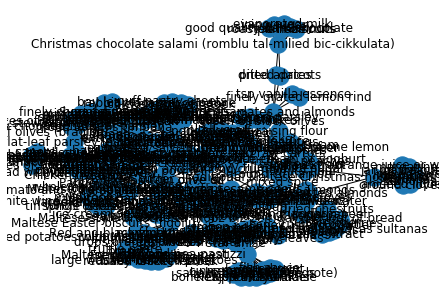

In [18]:
graph = nx.from_pandas_edgelist(sbsData, source='DishName', target='Ingredient')
nx.draw(graph, with_labels = True)